<a href="https://colab.research.google.com/github/Grashch/Data-science/blob/main/Titanic_Tree1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
train_data.shape, test_data.shape

((891, 12), (418, 11))

In [3]:
train_data.head().transpose()

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [4]:
train_data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

In [6]:
cat_features = ['Sex', 'Embarked']
num_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [7]:
cat_features

['Sex', 'Embarked']

In [8]:
encoder = OneHotEncoder()
encoder.fit(train_data[cat_features])

OneHotEncoder()

In [9]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S', nan], dtype=object)]

In [10]:
categories = []
for i, feature in enumerate(cat_features):
    categories.extend([f'{feature}:{value}' for value in encoder.categories_[i]])
categories

['Sex:female',
 'Sex:male',
 'Embarked:C',
 'Embarked:Q',
 'Embarked:S',
 'Embarked:nan']

In [11]:
train_data.loc[:, categories] = encoder.transform(train_data[cat_features]).toarray()
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex:female,Sex:male,Embarked:C,Embarked:Q,Embarked:S,Embarked:nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
X = train_data[categories + num_features]
y = train_data['Survived']
X.shape, y.shape

((891, 11), (891,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
round(y_train.value_counts() / y_train.shape * 100, 2), round(y_test.value_counts() / y_test.shape * 100, 2)

(Survived
 0    61.64
 1    38.36
 Name: count, dtype: float64,
 Survived
 0    61.57
 1    38.43
 Name: count, dtype: float64)

In [41]:
def get_score(model):
  result = []
  y_pred = model.predict_proba(X_train)
  roc_auc = roc_auc_score(y_train, y_pred[:, 1])
  accuracy = accuracy_score(y_train, y_pred.argmax(axis=1))
  f1 = f1_score(y_train, y_pred.argmax(axis=1))
  result.append(['Train', round(roc_auc, 2), round(accuracy, 2), round(f1, 2)])
  y_pred = model.predict_proba(X_test)
  roc_auc = roc_auc_score(y_test, y_pred[:, 1])
  accuracy = accuracy_score(y_test, y_pred.argmax(axis=1))
  f1 = f1_score(y_test, y_pred.argmax(axis=1))
  result.append(['Test', round(roc_auc, 2), round(accuracy, 2), round(f1, 2)])
  return pd.DataFrame(columns=['Type', 'roc_auc', 'accuracy', 'f1'], data=result)

In [24]:
# Вариант от Алисы
def get_score1(model, X_train, y_train, X_test, y_test):
    """
    Оценивает модель на обучающей и тестовой выборках.

    Параметры:
    - model: обученная модель с методом predict_proba
    - X_train, y_train: обучающие данные
    - X_test, y_test: тестовые данные

    Возвращает:
    - DataFrame с метриками для train/test
    """
    result = []

    # Оценка на обучающей выборке
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]  # вероятность класса 1
    y_pred_train = (y_pred_proba_train > 0.5).astype(int)  # бинарные предсказания

    roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    result.append(['Train', roc_auc_train, accuracy_train, f1_train])

    # Оценка на тестовой выборке
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]
    y_pred_test = (y_pred_proba_test > 0.5).astype(int)

    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    result.append(['Test', roc_auc_test, accuracy_test, f1_test])

    return pd.DataFrame(
        columns=['Type', 'roc_auc', 'accuracy', 'f1'],
        data=result
    )

In [15]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
get_score(tree)

,Type,roc_auc,accuracy,f1
0,Train,1.00,0.98,0.97
1,Test,0.73,0.75,0.67


In [25]:
get_score1(tree,
           X_train, y_train,
           X_test, y_test
           )

,Type,roc_auc,accuracy,f1
0,Train,0.999090,0.980738,0.974359
1,Test,0.729362,0.750000,0.666667


In [17]:
grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [2, 3, 5, 7],
    'min_samples_leaf' : [4, 5, 6, 7],
    'min_impurity_decrease' : [0.005, 0.007, 0.01, 0.012]
}

search = GridSearchCV(tree, grid)
search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 7],
                         'min_impurity_decrease': [0.005, 0.007, 0.01, 0.012],
                         'min_samples_leaf': [4, 5, 6, 7]})

In [29]:
search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_impurity_decrease': 0.01,
 'min_samples_leaf': 4}

In [30]:
tree1 = DecisionTreeClassifier(**search.best_params_)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       min_impurity_decrease=0.01, min_samples_leaf=4)

In [43]:
get_score(tree1)

,Type,roc_auc,accuracy,f1
0,Train,0.86,0.84,0.76
1,Test,0.83,0.79,0.67


In [26]:
get_score1(tree1,
           X_train, y_train,
           X_test, y_test
           )

,Type,roc_auc,accuracy,f1
0,Train,0.863603,0.839486,0.757282
1,Test,0.829067,0.787313,0.674286


In [21]:
tree1.feature_importances_

array([0.        , 0.59618954, 0.        , 0.        , 0.        ,
       0.        , 0.23496215, 0.12651063, 0.        , 0.        ,
       0.04233768])

In [22]:
pd.DataFrame({
    'features' : categories + num_features,
    'importances' : tree1.feature_importances_
}).sort_values('importances', ascending=False).iloc[:5]

,features,importances
1,Sex:male,0.596190
6,Pclass,0.234962
7,Age,0.126511
10,Fare,0.042338
0,Sex:female,0.000000


In [31]:
grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [1, 2, 3],
    'min_samples_leaf' : [4, 5, 6, 7],
    'min_impurity_decrease' : [0.005, 0.007, 0.01, 0.012]
}

search = GridSearchCV(tree, grid)
search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3],
                         'min_impurity_decrease': [0.005, 0.007, 0.01, 0.012],
                         'min_samples_leaf': [4, 5, 6, 7]})

In [32]:
search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_impurity_decrease': 0.005,
 'min_samples_leaf': 4}

In [34]:
tree2 = DecisionTreeClassifier(**search.best_params_)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_impurity_decrease=0.005,
                       min_samples_leaf=4)

In [44]:
get_score(tree2)

,Type,roc_auc,accuracy,f1
0,Train,0.86,0.83,0.73
1,Test,0.83,0.79,0.67


In [36]:
pd.DataFrame({
    'Feater' : categories + num_features,
    'Importence' : tree2.feature_importances_
}).sort_values('Importence', ascending=False)

,Feater,Importence
0,Sex:female,0.663183
6,Pclass,0.191499
7,Age,0.097022
10,Fare,0.048296
1,Sex:male,0.000000
2,Embarked:C,0.000000
3,Embarked:Q,0.000000
5,Embarked:nan,0.000000
4,Embarked:S,0.000000
8,SibSp,0.000000


[Text(0.4444444444444444, 0.875, 'Sex:female <= 0.5\ngini = 0.473\nsamples = 623\nvalue = [384, 239]'),
 Text(0.2222222222222222, 0.625, 'Age <= 3.5\ngini = 0.304\nsamples = 406\nvalue = [330, 76]'),
 Text(0.3333333333333333, 0.75, 'True  '),
 Text(0.1111111111111111, 0.375, 'gini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.3333333333333333, 0.375, 'Pclass <= 1.5\ngini = 0.276\nsamples = 394\nvalue = [329, 65]'),
 Text(0.2222222222222222, 0.125, 'gini = 0.462\nsamples = 80\nvalue = [51, 29]'),
 Text(0.4444444444444444, 0.125, 'gini = 0.203\nsamples = 314\nvalue = [278, 36]'),
 Text(0.6666666666666666, 0.625, 'Pclass <= 2.5\ngini = 0.374\nsamples = 217\nvalue = [54, 163]'),
 Text(0.5555555555555556, 0.75, '  False'),
 Text(0.5555555555555556, 0.375, 'gini = 0.112\nsamples = 117\nvalue = [7, 110]'),
 Text(0.7777777777777778, 0.375, 'Fare <= 7.888\ngini = 0.498\nsamples = 100\nvalue = [47, 53]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.334\nsamples = 33\nvalue = [7, 26]'),
 Text(

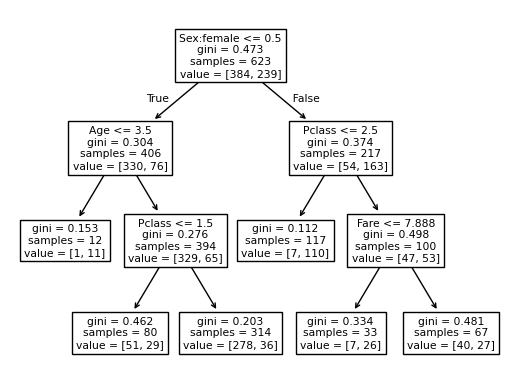

In [39]:
plot_tree(tree2, feature_names=categories + num_features)